## XML to trainval.txt (Image_path,x1, y1, x2, y2,class_name)

In [ ]:
#Mounting Drive to reach the XML files and to save the trainval.txt
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Importing required libraries
from xml.dom import minidom #to take xml documents and to turn them into csv files
import glob, os #to open files
import pandas as pd #to open files
import xml.etree.ElementTree as ET #to get the tree in xml files
import csv #to acces csv files
from google.colab.patches import cv2 #to read images
import matplotlib.pyplot as plt #to display images

In [ ]:
source_path = '/content/drive/MyDrive/keras-frcnn/ICDAR2019_cTDaR/test_ground_truth/TRACKA'
csv_path = '/content/drive/MyDrive/keras-frcnn/ICDAR2019_cTDaR/test_ground_truth/TRACKA/icdar_tracka_test_ground_truth.csv'
txt_path = '/content/drive/MyDrive/keras-frcnn/ICDAR2019_cTDaR/test_ground_truth/TRACKA/icdar_tracka_test_ground_truth.txt'

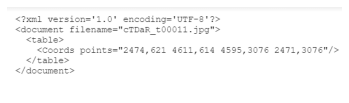

In [ ]:
#How does our XML File looks like?
img = cv2.imread('/content/drive/MyDrive/keras-frcnn/ICDAR2019_cTDaR/test_ground_truth/XMLFileLook.png')
plt.imshow(img), plt.axis("off")
plt.show()

In [ ]:
os.chdir(source_path)
with open(csv_path, mode='w') as csv_file:
  fieldnames = ['image_names', 'x_min', 'x_max', 'y_min', 'y_max', 'class_name']
  writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
  writer.writeheader()
  for file in glob.glob("*.xml"):
      tree = ET.parse(file)
      root = tree.getroot()
      #root is jpg name, where table is.
      jpgname = root.attrib
      jpgname = str(jpgname)
      jpgname = jpgname.replace("{'filename': '","")
      jpgname = jpgname.replace("'}","")
      for child in root:
        for points in child:
          points = str(points.attrib)
          points = points.replace("{'points': '","")
          points = points.replace("'}","")

          #points format now is like x1,y1 x2,y2 x3,y3 x4,y4
          #but what we need is lowest and highest x and y values
          values = points.split(' ')
          v1 = values[0]
          v2 = values[1]
          v3 = values[2]
          v4 = values[3]

          v1xy = v1.split(',')
          v2xy = v2.split(',')
          v3xy = v3.split(',')
          v4xy = v4.split(',')

          x1 = int(v1xy[0])
          y1 = int(v1xy[1])

          x2 = int(v2xy[0])
          y2 = int(v2xy[1])

          x3 = int(v3xy[0])
          y3 = int(v3xy[1])

          x4 = int(v4xy[0])
          y4 = int(v4xy[1])

          print('x1=' + str(x1) + ' x2=' + str(x2) + ' x3=' + str(x3) + ' x4=' + str(x4) + ' y1=' + str(y1) + ' y2=' + str(y2) + ' y3=' + str(y3) + ' y4=' + str(y4))

          #finding the lowest x value
          lx = min(x1, x2, x3, x4)

          #finding the highest x value
          hx = max(x1, x2, x3, x4)

          #finding the lowest y value
          ly = min(y1, y2, y3, y4)

          #finding the highest y value
          hy = max(y1, y2, y3, y4)

          #lx = str(lx)
          #hx = str(hx)
          #ly = str(ly)
          #hy = str(hy)
          
          writer.writerow({'image_names': jpgname, 'x_min': lx, 'x_max': hx, 'y_min': ly, 'y_max': hy, 'class_name': 'Table'})
      

x1=2474 x2=4611 x3=4595 x4=2471 y1=621 y2=614 y3=3076 y4=3076
x1=265 x2=2272 x3=2281 x4=247 y1=582 y2=632 y3=3144 y4=3144
x1=2475 x2=4571 x3=4562 x4=2472 y1=628 y2=633 y3=3109 y4=3109
x1=256 x2=2387 x3=2385 x4=252 y1=613 y2=584 y3=3216 y4=3216
x1=270 x2=4641 x3=4641 x4=270 y1=296 y2=296 y3=3694 y4=3694
x1=55 x2=4002 x3=4002 x4=55 y1=145 y2=145 y3=3283 y4=3283
x1=163 x2=4232 x3=4232 x4=163 y1=103 y2=103 y3=3398 y4=3398
x1=269 x2=5465 x3=5465 x4=269 y1=260 y2=260 y3=4209 y4=4209
x1=258 x2=4145 x3=4145 x4=258 y1=198 y2=198 y3=3303 y4=3303
x1=242 x2=5370 x3=5370 x4=242 y1=275 y2=275 y3=4565 y4=4565
x1=227 x2=4969 x3=4969 x4=227 y1=257 y2=257 y3=3896 y4=3896
x1=256 x2=5439 x3=5439 x4=256 y1=294 y2=294 y3=4367 y4=4367
x1=412 x2=5792 x3=5792 x4=412 y1=357 y2=357 y3=4180 y4=4180
x1=156 x2=3954 x3=3954 x4=156 y1=155 y2=155 y3=3288 y4=3288
x1=170 x2=4318 x3=4318 x4=170 y1=163 y2=163 y3=3296 y4=3296
x1=151 x2=4322 x3=4322 x4=151 y1=174 y2=174 y3=3303 y4=3303
x1=147 x2=4322 x3=4322 x4=147 y1=174 y

In [ ]:
ground_truth = pd.read_csv(csv_path)
ground_truth.head()

,image_names,x_min,x_max,y_min,y_max,class_name
0,cTDaR_t00011.jpg,2471,4611,614,3076,Table
1,cTDaR_t00012.jpg,247,2281,582,3144,Table
2,cTDaR_t00012.jpg,2472,4571,628,3109,Table
3,cTDaR_t00013.jpg,252,2387,584,3216,Table
4,cTDaR_t00070.jpg,270,4641,296,3694,Table


In [ ]:
#csvtotxt
data = pd.DataFrame()
data['format'] = ground_truth['image_names']

# as the images are in train_images folder, add train_images before the image name
for i in range(data.shape[0]):
    data['format'][i] = "./ICDAR2019_cTDaR/test_ground_truth/TRACKA" + data['format'][i]

# add xmin, ymin, xmax, ymax and class as per the format required
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(ground_truth['x_min'][i]) + ',' + str(ground_truth['y_min'][i]) + ',' + str(ground_truth['x_max'][i]) + ',' + str(ground_truth['y_max'][i]) + ',' + ground_truth['class_name'][i] 

data.to_csv(txt_path, header=None, index=None, sep=' ')